In [79]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [80]:
df = pd.read_csv('/content/Mall_Customers.csv')
df['Genre'] = LabelEncoder().fit_transform(df['Genre'])

In [81]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [82]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [83]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18
199,200,1,30,137,83


In [84]:
df[['Annual Income (k$)', 'Spending Score (1-100)']]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [85]:
import matplotlib.pyplot as plt

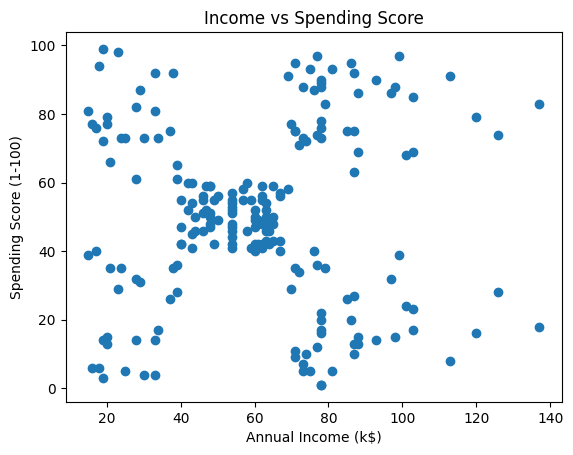

In [86]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs Spending Score')

plt.show()

In [87]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [97]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x = pd.DataFrame(X_scaled)
sse = []

for k in range(1,16):
  model = KMeans(n_clusters  = k)
  model.fit_predict(x)
  sse.append(model.inertia_)

In [89]:
sse

[399.99999999999994,
 277.8457188692878,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 57.2894494172146,
 46.87068757489703,
 42.01051074974255,
 34.816214785607336,
 31.582149541852537,
 26.752256375988242,
 24.865191366873034,
 22.46901169740878,
 20.385669607608072,
 18.478049728791166]

In [90]:
import matplotlib.pyplot as plt

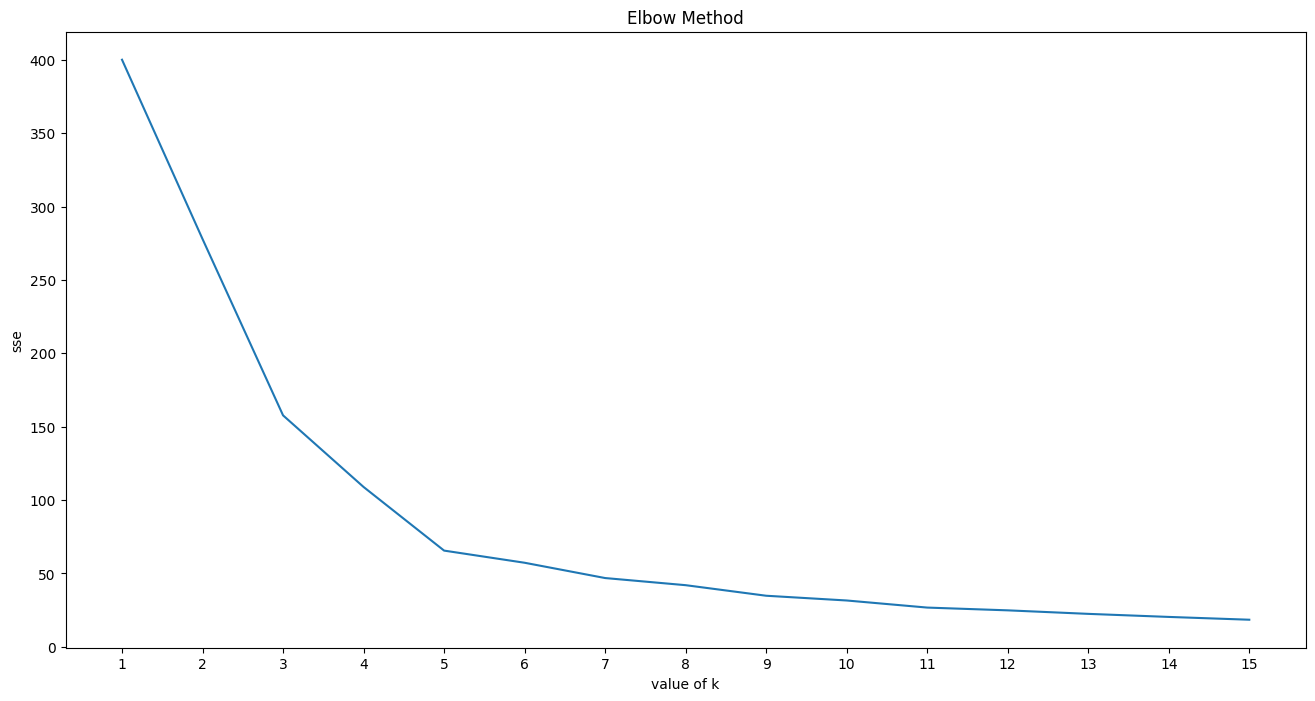

In [91]:
plt.figure(figsize=(16,8))
plt.xlabel('value of k')
plt.ylabel('sse')
plt.title('Elbow Method')
plt.xticks(range(1,16))
plt.plot(range(1,16), sse)
plt.show()

In [99]:
model = KMeans(n_clusters = 5, random_state = 42)
labels = model.fit_predict(x)
labels
x

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


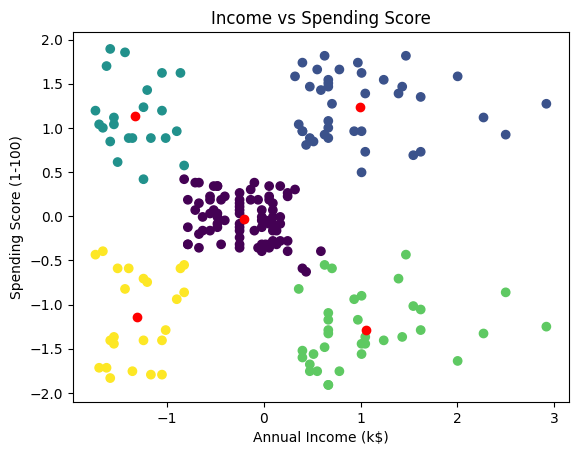

In [102]:
centriods = model.cluster_centers_
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs Spending Score')
plt.scatter(x.iloc[:,0], x.iloc[:,1], c = labels)
plt.scatter(centriods[:,0], centriods[:,1], c = 'red')
plt.show()



In [103]:

#2nd clustering

agl = AgglomerativeClustering(n_clusters=5)
alabels = agl.fit_predict(x)
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

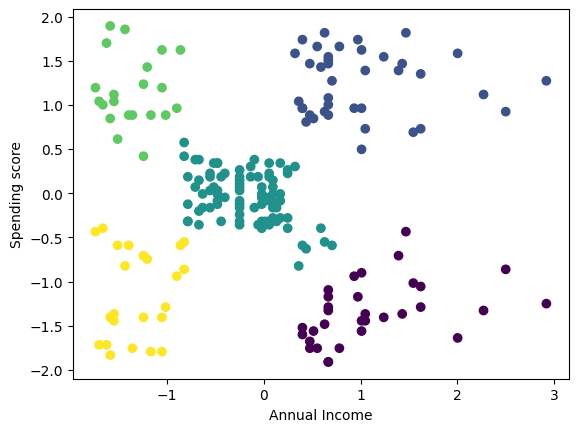

In [107]:
cent = km.cluster_centers_
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.scatter(x.iloc[:,0], x.iloc[:,1], c = alabels)
